# Part 2

In [0]:
import csv
import json
import random
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from scipy.sparse import csr_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
WA = ["Washington", "WASHINGTON", "WA", "Aberdeen", "ABERDEEN", "Anacortes", "ANACORTES", "Auburn", "AUBURN",
      "Bellevue", "BELLEVUE", "Bellingham", "BELLINGHAM", "Bremerton", "BREMERTON", "Centralia", "CENTRALIA",
      "Coulee Dam", "COULEE DAM", "Coupeville", "COUPEVILLE", "Ellensburg", "ELLENSBURG", "Ephrata", "EPHRATA",
      "Everett", "EVERETT", "Hoquiam", "HOQUIAM", "Kelso", "KELSO", "Kennewick", "KENNEWICK", "Longview", "LONGVIEW",
      "Moses Lake", "MOSES LAKE", "Oak Harbor", "OAK HARBOR", "Olympia", "OLYMPIA", "Pasco", "PASCO", "Point Roberts",
      "POINT ROBERTS", "Port Angeles", "PORT ANGELES", "Pullman", "PULLMAN", "Puyallup", "PUYALLUP", "Redmond",
      "REDMOND", "Renton", "RENTON", "Richland", "RICHLAND", "Seattle", "SEATTLE", "Spokane", "SPOKANE", "Tacoma",
      "TACOMA", "Walla Walla", "WALLA WALLA", "Wenatchee", "WENATCHEE", "Yakima", "YAKIMA"]

MA = ["Massachusetts", "MASSACHUSETTS", "MA", "Abington", "ABINGTON", "Adams", "ADAMS", "Amesbury", "AMESBURY",
      "Amherst", "AMHERST", "Andover", "ANDOVER", "Arlington", "ARLINGTON", "Athol", "ATHOL", "Attleboro", "ATTLEBORO",
      "Barnstable", "BARNSTABLE", "Bedford", "BEDFORD", "Beverly", "BEVERLY", "Boston", "BOSTON", "Bourne", "BOURNE",
      "Braintree", "BRAINTREE", "Brockton", "BROCKTON", "Brookline", "BROOKLINE", "Cambridge", "CAMBRIDGE", "Canton",
      "CANTON", "Charlestown", "CHARLESTOWN", "Chelmsford", "CHELMSFORD", "Chelsea", "CHELSEA", "Chicopee", "CHICOPEE",
      "Clinton", "CLINTON", "Cohasset", "COHASSET", "Concord", "CONCORD", "Danvers", "DANVERS", "Dartmouth",
      "DARTMOUTH", "Dedham", "DEDHAM", "Dennis", "DENNIS", "Duxbury", "DUXBURY", "Eastham", "EASTHAM", "Edgartown",
      "EDGARTOWN", "Everett", "EVERETT", "Fairhaven", "FAIRHAVEN", "Fall River", "FALL RIVER", "Falmouth", "FALMOUTH",
      "Fitchburg", "FITCHBURG", "Framingham", "FRAMINGHAM", "Gloucester", "GLOUCESTER", "Great Barrington",
      "GREAT BARRINGTON", "Greenfield", "GREENFIELD", "Groton", "GROTON", "Harwich", "HARWICH", "Haverhill",
      "HAVERHILL", "Hingham", "HINGHAM", "Holyoke", "HOLYOKE", "Hyannis", "HYANNIS", "Ipswich", "IPSWICH", "Lawrence",
      "LAWRENCE", "Lenox", "LENOX", "Leominster", "LEOMINSTER", "Lexington", "LEXINGTON", "Lowell", "LOWELL", "Ludlow",
      "LUDLOW", "Lynn", "LYNN", "Malden", "MALDEN", "Marblehead", "MARBLEHEAD", "Marlborough", "MARLBOROUGH", "Medford",
      "MEDFORD", "Milton", "MILTON", "Nahant", "NAHANT", "Natick", "NATICK", "New Bedford", "NEW BEDFORD",
      "Newburyport", "NEWBURYPORT", "Newton", "NEWTON", "North Adams", "NORTH ADAMS", "Northampton", "NORTHAMPTON",
      "Norton", "NORTON", "Norwood", "NORWOOD", "Peabody", "PEABODY", "Pittsfield", "PITTSFIELD", "Plymouth",
      "PLYMOUTH", "Provincetown", "PROVINCETOWN", "Quincy", "QUINCY", "Randolph", "RANDOLPH", "Revere", "REVERE",
      "Salem", "SALEM", "Sandwich", "SANDWICH", "Saugus", "SAUGUS", "Somerville", "SOMERVILLE", "South Hadley",
      "SOUTH HADLEY", "Springfield", "SPRINGFIELD", "Stockbridge", "STOCKBRIDGE", "Stoughton", "STOUGHTON",
      "Sturbridge", "STURBRIDGE", "Sudbury", "SUDBURY", "Taunton", "TAUNTON", "Tewksbury", "TEWKSBURY", "Truro",
      "TRURO", "Watertown", "WATERTOWN", "Webster", "WEBSTER", "Wellesley", "WELLESLEY", "Wellfleet", "WELLFLEET",
      "West Bridgewater", "WEST BRIDGEWATER", "West Springfield", "WEST SPRINGFIELD", "Westfield", "WESTFIELD",
      "Weymouth", "WEYMOUTH", "Whitman", "WHITMAN", "Williamstown", "WILLIAMSTOWN", "Woburn", "WOBURN", "Woods Hole",
      "WOODS HOLE", "Worcester", "WORCESTER"]

In [0]:
tweet_highlight = []
location_set = set([])
location_list = []
tweet_labels = []

input_file = open('tweets_#superbowl.txt')

for line in input_file:
    data = json.loads(line)
    tweet_highlight.append(data['highlight'])
    location_set.add(data['tweet']['user']['location'])
    location_list.append(data['tweet']['user']['location'])

selected_WA = set([])
selected_MA = set([])
WA_set = set(WA)
MA_set = set(MA)

count_set_WA = 0
count_set_MA = 0
location_to_include = WA + MA

for state in location_to_include:
    for location in location_set:
        if state in location:
            if state in WA_set and 'DC' not in location and 'D.C.' not in location:
                selected_WA.add(location)
                count_set_WA += 1
            elif state in MA_set:
                selected_MA.add(location)
                count_set_MA += 1

count_list_WA = 0
count_list_MA = 0
for location in location_list:
    if location in selected_WA:
        count_list_WA += 1
        tweet_labels.append(1)
    elif location in selected_MA:
        count_list_MA += 1
        tweet_labels.append(-1)
    else:
        tweet_labels.append(0)

content_list = []
true_labels = []

for (token, label) in zip(tweet_highlight, tweet_labels):
    if label != 0:
        content_list.append(token)
        true_labels.append(label)

csv_out = open('true_labels.csv', 'wb')
myWriter = csv.writer(csv_out)
myWriter.writerow(true_labels)


In [0]:
stemmer = SnowballStemmer("english")
punctuations = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'


def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i] = re.sub(r"https?:\/\/\S+", '', data_list[i])
        data_list[i] = " ".join([stemmer.stem(data) for data in re.split(punctuations, data_list[i])])
        data_list[i] = data_list[i].replace('\n', '').replace('\t', '').replace('\r', '')


remove_punctuation_and_stem(content_list)

In [0]:
count_vect = CountVectorizer(stop_words='english',min_df=2, max_df = 0.99)
X_counts = count_vect.fit_transform(content_list)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42, algorithm='arpack')
svd.fit(X_tfidf)
LSI = svd.transform(X_tfidf)

In [0]:
LSI_train, LSI_test, true_label_train, true_label_test = train_test_split(LSI, true_labels, test_size=0.1, random_state=0)

In [0]:
def report_classification(truth, prediction, classifier):
    print '\n              Classification report:'
    print '======================================================='
    print 'Classifier: ' + classifier

    print '======================================================='
    print metrics.classification_report(truth, prediction, target_names=["Washington", "Massachusetts"]),
    print '=======================================================\n'

    print 'Confusion Matrix:'
    print '=============='
    print metrics.confusion_matrix(truth, prediction)
    print '==============\n'

    print 'Total accuracy: '
    print np.mean(prediction == truth)
    print '\n\n\n\n'

    return np.mean(prediction == truth)

In [0]:
def plot_roc(truth, score):
    fpr, tpr, threshold = roc_curve(truth, score, pos_label=1)
    line = [0, 1]
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.title('ROC-Curve', fontsize=20)
    plt.axis([-0.004, 1, 0, 1.006])
    plt.show()


              Classification report:
Classifier: SVM
               precision    recall  f1-score   support

   Washington       0.75      0.95      0.84      3336
Massachusetts       0.86      0.52      0.65      2156

  avg / total       0.80      0.78      0.76      5492

Confusion Matrix:
[[3154  182]
 [1035 1121]]

Total accuracy: 
0.7784049526584123







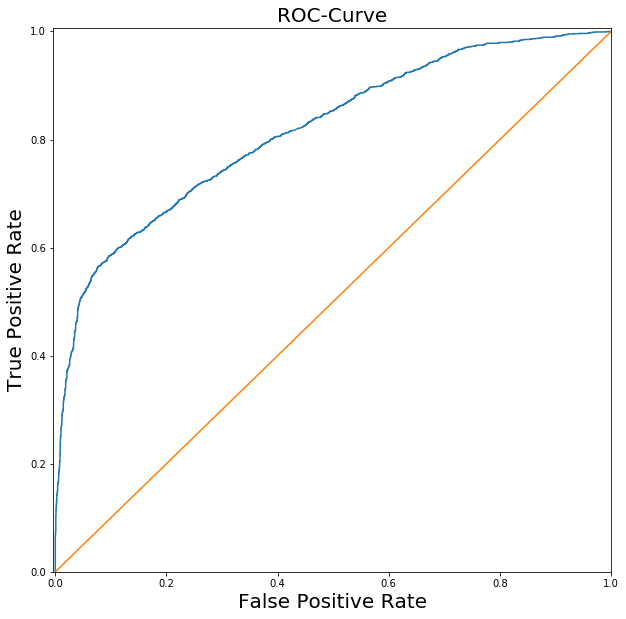

In [0]:
classifier = svm.SVC(gamma=6)
classifier.fit(LSI_train, true_label_train)
predicted_labels = classifier.predict(LSI_test)
scores = classifier.decision_function(LSI_test)

report_classification(true_label_test, predicted_labels, 'SVM')
plot_roc(true_label_test, scores)


              Classification report:
Classifier: Logistic Regression
               precision    recall  f1-score   support

   Washington       0.76      0.94      0.84      3336
Massachusetts       0.86      0.53      0.65      2156

  avg / total       0.80      0.78      0.77      5492

Confusion Matrix:
[[3144  192]
 [1013 1143]]

Total accuracy: 
0.7805899490167516







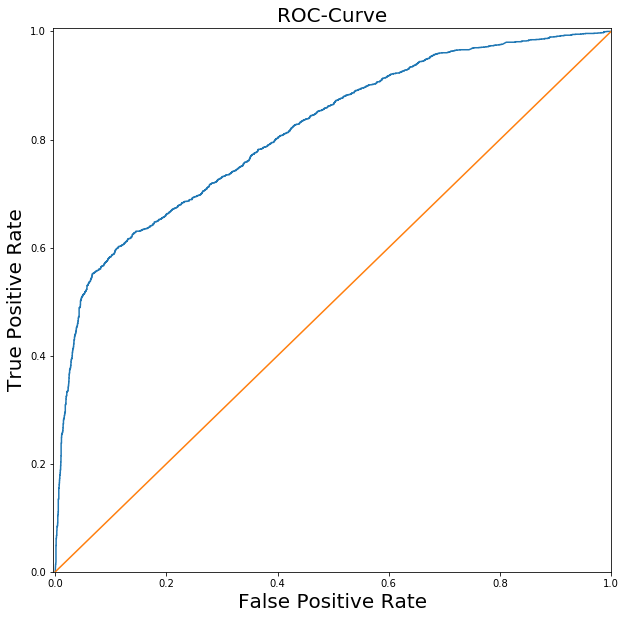

In [0]:
classifier = LogisticRegression()
classifier.fit(LSI_train, true_label_train)
predicted_labels = classifier.predict(LSI_test)
predict_probability = classifier.predict_proba(LSI_test[:])[:, 1]

report_classification(true_label_test, predicted_labels, 'Logistic Regression')
plot_roc(true_label_test, predict_probability)


              Classification report:
Classifier: Naive Bayes
               precision    recall  f1-score   support

   Washington       0.74      0.92      0.82      3336
Massachusetts       0.80      0.49      0.61      2156

  avg / total       0.76      0.75      0.74      5492

Confusion Matrix:
[[3079  257]
 [1102 1054]]

Total accuracy: 
0.7525491624180627







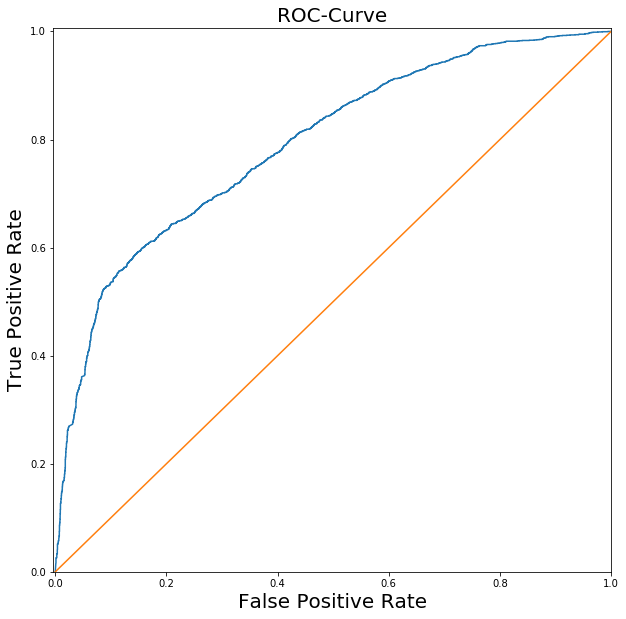

In [0]:
classifier = GaussianNB()
classifier.fit(LSI_train, true_label_train)
predicted_labels = classifier.predict(LSI_test)
predict_probability = classifier.predict_proba(LSI_test[:])[:, 1]

report_classification(true_label_test, predicted_labels, 'Naive Bayes')
plot_roc(true_label_test, predict_probability)


              Classification report:
Classifier: Multi-layer Perceptron
               precision    recall  f1-score   support

   Washington       0.76      0.93      0.84      3336
Massachusetts       0.84      0.55      0.66      2156

  avg / total       0.79      0.78      0.77      5492

Confusion Matrix:
[[3116  220]
 [ 974 1182]]

Total accuracy: 
0.7825928623452294







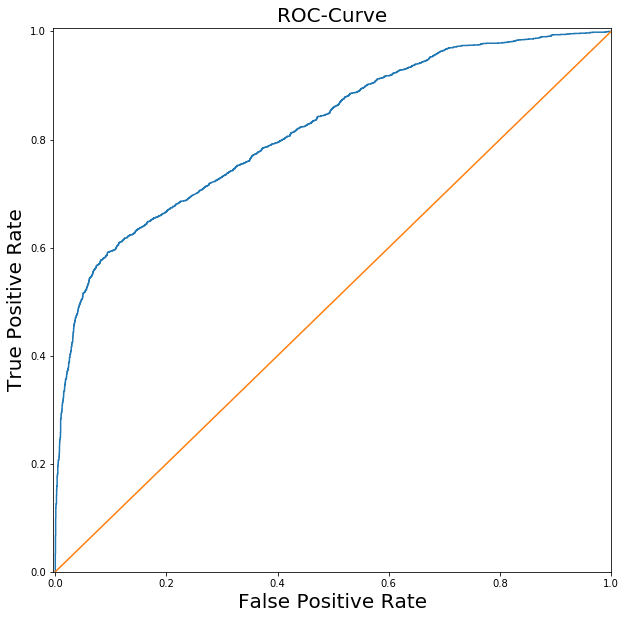

In [0]:
classifier = MLPClassifier()
classifier.fit(LSI_train, true_label_train)
predicted_labels = classifier.predict(LSI_test)
predict_probability = classifier.predict_proba(LSI_test[:])[:, 1]

report_classification(true_label_test, predicted_labels, 'Multi-layer Perceptron')
plot_roc(true_label_test, predict_probability)


              Classification report:
Classifier: Random Forest
               precision    recall  f1-score   support

   Washington       0.77      0.93      0.84      3336
Massachusetts       0.84      0.56      0.67      2156

  avg / total       0.79      0.78      0.77      5492

Confusion Matrix:
[[3098  238]
 [ 948 1208]]

Total accuracy: 
0.7840495265841224







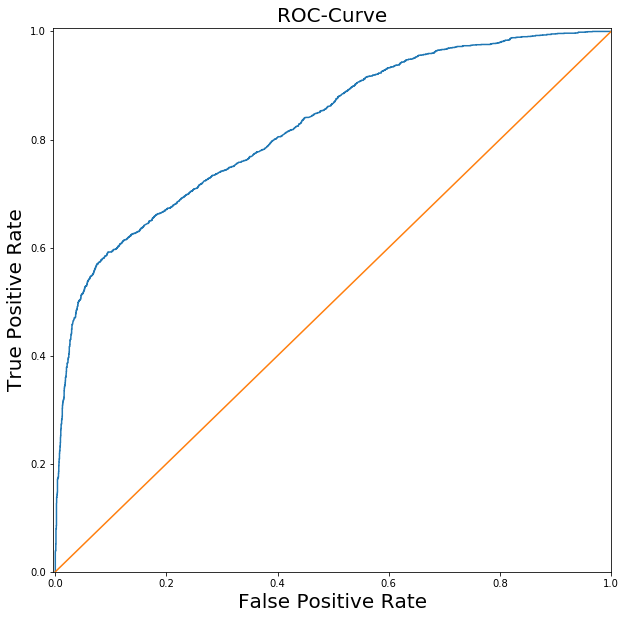

In [0]:
classifier = RandomForestClassifier(max_depth=10, n_estimators=20, max_features=1)
classifier.fit(LSI_train, true_label_train)
predicted_labels = classifier.predict(LSI_test)
predict_probability = classifier.predict_proba(LSI_test[:])[:, 1]

report_classification(true_label_test, predicted_labels, 'Random Forest')
plot_roc(true_label_test, predict_probability)